In [26]:
import numpy

In [27]:
from matplotlib import pyplot

In [28]:
%matplotlib inline

In [29]:
T=100.0

In [30]:
dt=0.02

In [31]:
N=int(T/dt)+1

In [32]:
t=numpy.linspace(0.0,T,N)

See notebook called "Module_01_02_Challenge1" for Challenge Question found here

In [33]:
z0=100

In [34]:
b0=10

In [35]:
zt=100

In [36]:
g=9.81

In [37]:
u=numpy.array([z0,b0])

In [38]:
z=numpy.zeros(N)

In [39]:
z[0]=z0

In [40]:
?numpy.zeros

In [41]:
for n in range(1,N):
    u=u+dt*numpy.array([u[1],g*(1-u[0]/zt)])
    z[n]=u[0]

In [42]:
pyplot.figure(figsize=(10,4))

(40, 160)

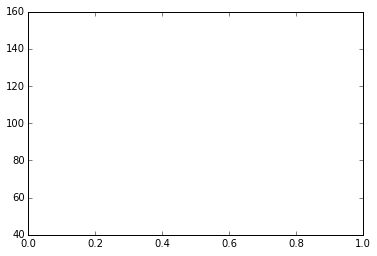

In [43]:
pyplot.ylim(40,160)

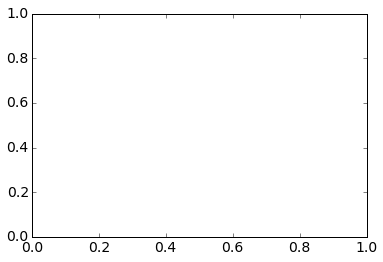

In [44]:
pyplot.tick_params(axis='both', labelsize=14)

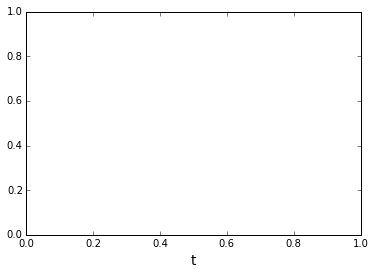

In [45]:
pyplot.xlabel('t', fontsize=14)

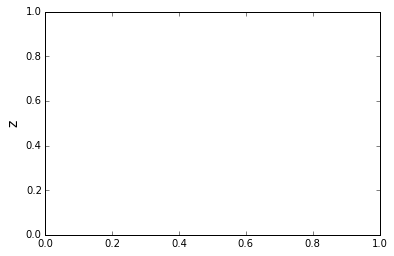

In [46]:
pyplot.ylabel('z', fontsize=14)

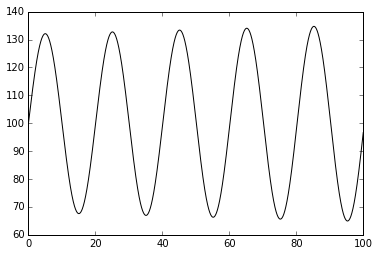

In [47]:
pyplot.plot(t,z,'k-');

In [48]:
pyplot.figure(figsize=(10,4))

In [49]:
print (numpy.shape(t))

(5001,)


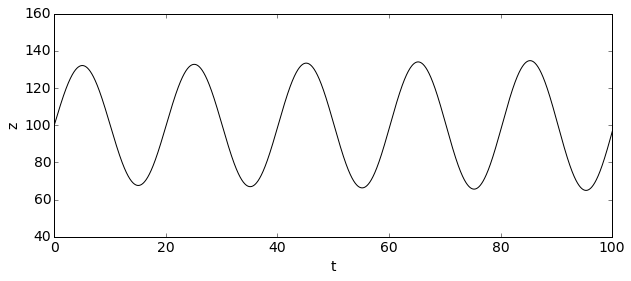

In [50]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40,160)
pyplot.tick_params(axis='both',labelsize=14)
pyplot.xlabel('t',fontsize=14)
pyplot.ylabel('z',fontsize=14)
pyplot.plot(t,z,'k-');

In [51]:
z_exact=b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+(z0-zt)*numpy.cos((g/zt)**.5*t)+zt

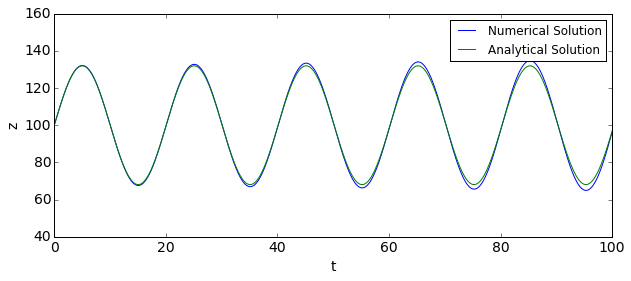

In [52]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40,160)
pyplot.tick_params(axis='both',labelsize=14)
pyplot.xlabel('t',fontsize=14)
pyplot.ylabel('z',fontsize=14)
pyplot.plot(t,z)
pyplot.plot(t,z_exact)
pyplot.legend(['Numerical Solution','Analytical Solution']);

In [53]:
#time-increment array
dt_values=numpy.array([0.1,0.05,0.01,0.005,0.001,0.0001])

#array that will contain solution of each grid
z_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N=int(T/dt)+1 #number of time-steps
    ###discretize the time using numpy.linespace()###
    t=numpy.linspace(0.0,T,N)
    
    #initial conditions
    u=numpy.array([z0,b0])
    z=numpy.empty_like(t)
    z[0]=z0
    
    #time loop - Euler method
    for n in range (1,N):
        ###compute next solution using Euler method ###
        u-u+dt*numpy.array([u[1],g*(1-u[0]/zt)])
        z[n]=u[0] #store the elevation at time-step n+1
        
    z_values = z.copy #store the total elevation calculation grid i

In [54]:
def get_error(z,dt):
   
    N=len(z)
    t=numpy.linspace(0.0,T,N)
    
    z_exact=b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+(z0-zt)*numpy.cos((g/zt)**.5*t)+zt
    return dt*numpy.sum(numpy.abs(z-z_exact))

In [55]:
a = numpy.array([1,2,3])
b = numpy.array([4,4,4])

In [56]:
b-a

array([3, 2, 1])

In [93]:
error_values=numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    ### call the function get_error() ###
    error_values[i]=get_error(z_values(i),dt)

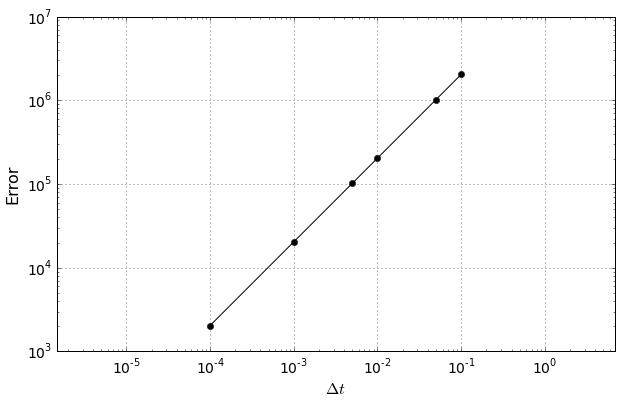

In [94]:
pyplot.figure(figsize=(10,6))
pyplot.tick_params(axis='both',labelsize=14) #increase tick font size
pyplot.grid(True)
pyplot.xlabel('$\Delta t$',fontsize=16) #x label
pyplot.ylabel('Error',fontsize=16) #y label
pyplot.loglog(dt_values,error_values,'ko-') #log-log plot
pyplot.axis('equal') #make axes scale equally;

See notebook called "Module_01_02_Challenge2" for Challenge Question found here